In [12]:
import httpx
import pandas as pd

from pathlib import Path

In [3]:
DATASET_ID = "641b456a5374b1bdc9dce4cf"

In [8]:
def get_resources():
    url = f"https://www.data.gouv.fr/api/2/datasets/{DATASET_ID}/resources/"
    r = httpx.get(url)
    data = r.json()
    assert data["next_page"] is None
    return data["data"]

resources = get_resources()

In [16]:
for r in resources:
    title = r["title"]
    p = Path(f"data/{title}")
    if not p.exists():
        r = httpx.get(r["url"])
        with p.open("wb") as f:
            f.write(r.content)

In [19]:
df_list = []
for f in Path("data/").glob("*.csv"):
    df_list.append(pd.read_csv(f))
df = pd.concat(df_list)

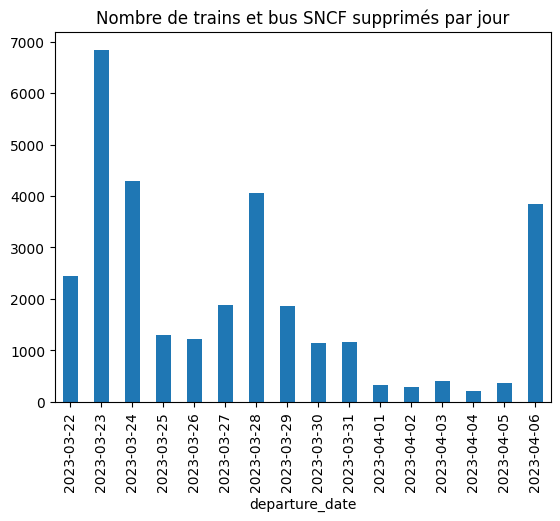

In [31]:
ax = df.groupby("departure_date")["departure"].count().plot.bar(title="Nombre de trains et bus SNCF supprimés par jour")

In [37]:
fig = ax.get_figure()
fig.savefig("tr-rm_2023-03-33_2023-04-06.png", bbox_inches="tight")

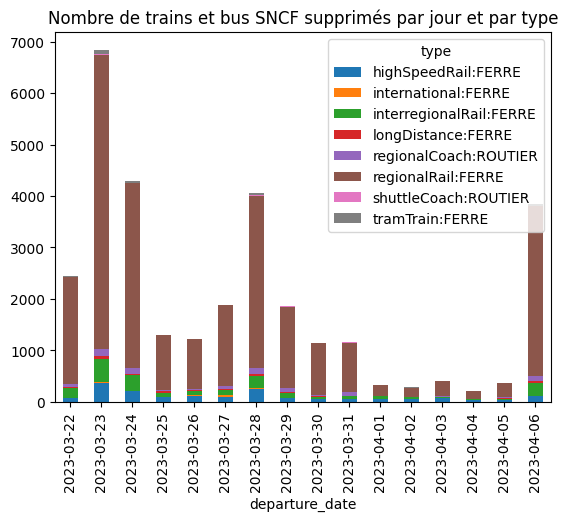

In [43]:
ax = df.groupby(["departure_date", "type"]).size().unstack().plot(kind="bar", stacked=True, title="Nombre de trains et bus SNCF supprimés par jour et par type")

In [44]:
fig = ax.get_figure()
fig.savefig("tr-rm_2023-03-33_2023-04-06_by-type.png", bbox_inches="tight")